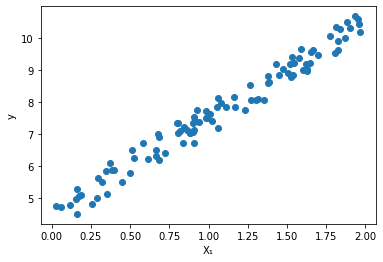

In [27]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.xlabel("X\u2081"); plt.ylabel("y");
# plt.savefig("fig.png")

In [28]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.53874526]
 [2.97746815]]


In [29]:
 X_new = np.array([[0], [2]])
 X_new_b = np.c_[np.ones((2, 1)), X_new]
 y_predict = X_new_b.dot(theta_best)
 y_predict

array([[ 4.53874526],
       [10.49368157]])

In [30]:
y_new = 4 + 3 * X_new
np.mean(y_predict - y_new)

0.5162134132541008

(0.0, 2.0, 0.0, 15.0)

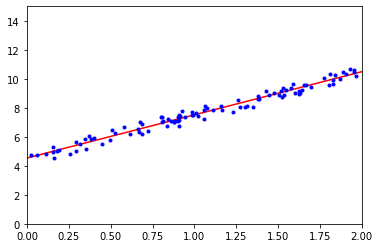

In [31]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
# plt.savefig("fig2.png")

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
## intercept and coef are name convention in sklearn for bias and weights
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)

(array([4.53874526]),
 array([[2.97746815]]),
 array([[ 4.53874526],
        [10.49368157]]))

In [33]:
lin_reg.predict(X_new) ## same as previously we computed

array([[ 4.53874526],
       [10.49368157]])

In [34]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.53874526],
       [2.97746815]])

In [35]:
np.linalg.pinv(X_b).dot(y)

array([[4.53874526],
       [2.97746815]])

In [36]:
eta = 0.1 # learning rate
n_iters = 1000
m = 100

theta = np.random.randn(2,1) # random initializer

for iteration in range(n_iters):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
theta

array([[4.53874526],
       [2.97746815]])

In [37]:
np.array([[0], [2]]), theta, np.c_[np.ones((2, 1)), np.array([[0], [2]])], np.c_[np.ones((2, 1)), np.array([[0], [2]])].dot(theta)

(array([[0],
        [2]]),
 array([[4.53874526],
        [2.97746815]]),
 array([[1., 0.],
        [1., 2.]]),
 array([[ 4.53874526],
        [10.49368157]]))

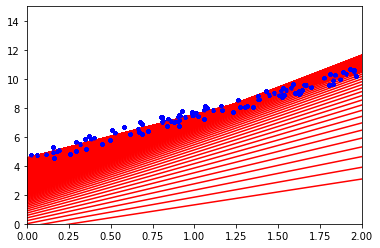

In [38]:
eta = 0.02 # learning rate
n_iters = 1000
m = 100
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
c_theta = np.random.randn(2,1) # random initializer

for iteration in range(n_iters):
    gradients = 2/m * X_b.T.dot(X_b.dot(c_theta) - y)
    c_theta = c_theta - eta*gradients
    y_pred = X_new_b.dot(c_theta)
    plt.plot(X_new, y_pred, "r-")
    plt.plot(X, y, "b.")
    plt.axis([0, 2, 0, 15])
plt.show()

In [39]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.52737973],
       [2.97729059]])

In [40]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [41]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52790246]), array([2.98915224]))

## Polynomial Reg.

(-5.0, 5.0, 0.0, 10.0)

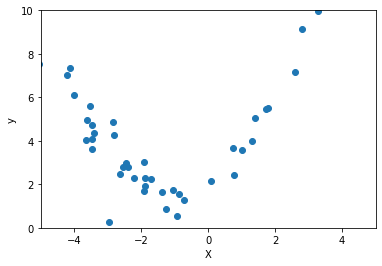

In [42]:
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X, y)
plt.xlabel("X"); plt.ylabel("y")
plt.axis([-5, 5, 0, 10])

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-5.86388267]), array([-5.86388267, 34.38512002]))

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90019266]), array([[0.9854965 , 0.50175079]]))

In [45]:
y_pred = lin_reg.predict(X_poly)

(-5.0, 5.0, 0.0, 10.0)

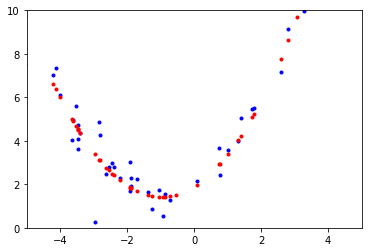

In [46]:
plt.plot(X, y, "b.")
plt.plot(X, y_pred, "r.")
plt.axis([-5, 5, 0, 10])

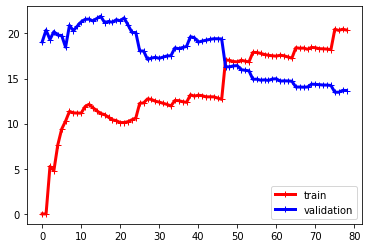

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=3, label="train")
    plt.plot(np.sqrt(val_errors), "b-+", linewidth=3, label="validation")
    plt.legend()
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 80.0, 0.0, 3.0)

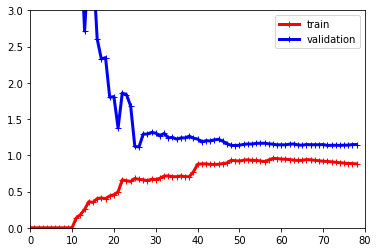

In [48]:
from sklearn.pipeline import Pipeline

polynomial_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_pipeline, X, y)
plt.axis([0, 80, 0, 3])

In [51]:
from sklearn.linear_model import Ridge
ridge_rig = Ridge(alpha=1, solver="cholesky")
ridge_rig.fit(X, y)
ridge_rig.predict([[1.5]])

array([[10.58810846]])

In [53]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.86736954])

In [54]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([10.59984027])

In [56]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([10.61062958])

In [61]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
    ("std_scaler", StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, 
                      penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
best_epoch, best_model, minimum_val_error

(5,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True),
 267.75146255094086)

In [65]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris["data"][:, 3:], (iris["target"] == 2).astype(np.int_)

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

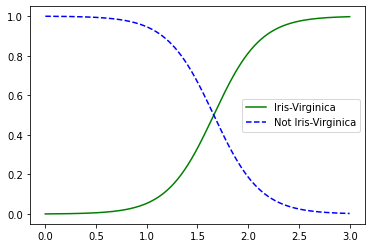

In [76]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()

In [78]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [79]:
X, y = iris["data"][:, (2, 3)], iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [82]:
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))